# 01. 딥러닝과 데이터
- 좋은데이터: 한쪽으로 치우치지 않고, 불필요한 정보가 (대량으로) 포함되어 있지 않으며, 왜곡되지 않은 데이터를 의미
- 데이터의 양도 중요하지만 그 안에 필요한 데이터가 얼마나 있는가도 중요
- 이를 잘 정제된 데이터 형식으로 바꾸어야 함

# 02. 피마 인디언 데이터 분석하기
- 비만은 유전일까? 아니면 식습관 조절에 실패한 자신의 탓일까?

# 03. 판다스를 활용한 데이터 조사

In [1]:
# 필요한 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 피마 인디언 당뇨병 데이터셋을 불러옵니다.
df = pd.read_csv('pima-indians-diabetes3.csv')

In [2]:
df.head(5)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [4]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [6]:
colormap = plt.cm.gist_heat # 그래프의 색상 구성을 정합니다.
plt.figure(figsize=(12,12)) # 그래프의 크기를 정합니다.

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

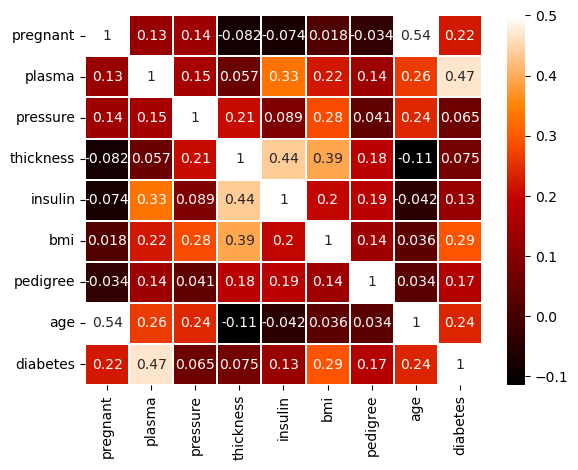

In [7]:
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='white',
           annot = True)
plt.show()

# 04. 중요한 데이터 추출하기
- 상관관계 그림을 살펴보면 plasma 항목 (공복 혈당 농도)과 BMI (체질량 지수)가 우리가 예측하고자 하는 diabetes 항목과 상관관계가 높다는 것을 알수 있다.

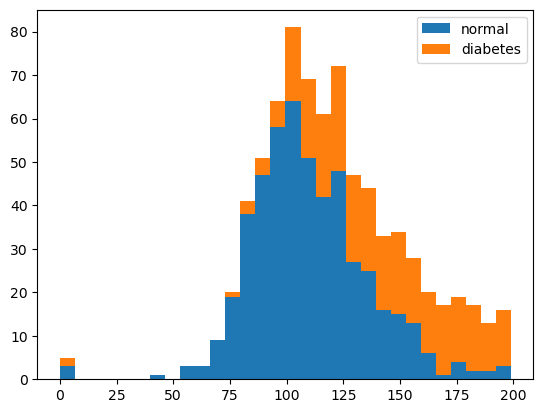

In [8]:
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30,
        histtype='barstacked', label=['normal', 'diabetes'])
plt.legend()

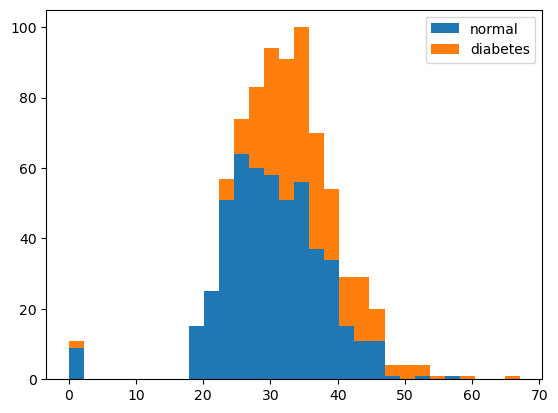

In [9]:
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30,
        histtype='barstacked', label=['normal', 'diabetes'])
plt.legend()
# BMI가 높아질 경우 당뇨의 발병률도 함께 증가하는 추세를 볼 수 있음

# 05. 피마 인디언의 당뇨병 예측 실행

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np

# 피마 인디언 당뇨병 데이터셋을 불러옵니다.

df = pd.read_csv('pima-indians-diabetes3.csv')

x = df.iloc[:, 0:8] # 세부 정보를 x로 지정한다.
y = df.iloc[:, 8]  # 당뇨병 여부를 y로 지정한다.

In [11]:
# 모델 구조 설정
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1'))
model.add(Dense(8, activation='relu', name='Dense_2'))
model.add(Dense(1, activation='sigmoid', name='Dense_3'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 12)                108       
                                                                 
 Dense_2 (Dense)             (None, 8)                 104       
                                                                 
 Dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Layer 부분 층의 이름과 유형을 나타냄
# 각 층의 이름은 자동으로 정해지는데 따로 이름을 만들려면 Dense() 함수 안에 name='이름' 추가

In [ ]:
# Output Shape 부분
# 각 층에 몇 개의 출력이 발생하는지 나타냄

In [ ]:
# Param 부분
# 파라미터 수, 즉 총 가중치와 바이어스 수의 합을 나타냄

In [ ]:
# 요약 부분
# 전체 파라미터를 합산한 값

In [ ]:
# 은닉층의 개수를 왜 두 개로 했나요? 노드의 수는 왜 12개와 8개로 했나요?
# 입력과 출력은 정해져 있지만 그 안에 수는 정답이 없음 자신의 프로젝트에 따라 설정

In [12]:
# 모델을 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# 모델을 실행
history = model.fit(x, y, epochs=100, batch_size=5)

Epoch 1/100
154/154 [==============================] - 2s 3ms/step - loss: 4.4998 - accuracy: 0.4779
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 1.1244 - accuracy: 0.6003
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 0.7990 - accuracy: 0.6289
Epoch 4/100
154/154 [==============================] - 0s 2ms/step - loss: 0.7360 - accuracy: 0.6576
Epoch 5/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.6484
Epoch 6/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.6576
Epoch 7/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.6549
Epoch 8/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6444 - accuracy: 0.6719
Epoch 9/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.6810
Epoch 10/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6265 - accura

154/154 [==============================] - 0s 2ms/step - loss: 0.4975 - accuracy: 0.7591
Epoch 82/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.7643
Epoch 83/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.7591
Epoch 84/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7578
Epoch 85/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4888 - accuracy: 0.7695
Epoch 86/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.7669
Epoch 87/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.7552
Epoch 88/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7695
Epoch 89/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4939 - accuracy: 0.7708
Epoch 90/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 